# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Using PCA to reduce dimensionality 

In [6]:
p = PCA(n_components=10)  
X_train_p = p.fit_transform(X_train)
X_test_p = p.transform(X_test)

## Use linear regression to predict

In [7]:
model = LinearRegression()
model.fit(X_train_p, y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test_p)

In [9]:
predictions

array([ 1.15254535,  0.72655548,  0.82591051,  0.29561098,  0.93464221,
        1.11424926,  1.12565431,  0.89999464,  0.99550592, -0.27280452,
        0.69554912, -0.23607381,  0.12276024,  0.95852896,  1.11277164,
        0.55094222,  0.18971639,  0.77003591, -0.11650383,  0.46490611,
        0.90648554, -0.11748262, -0.29246554,  0.73162479, -0.38097324,
        1.14559532,  0.8284311 ,  0.73147828,  0.36370767,  0.75779637,
        1.24651625,  1.14507644,  0.77003301,  0.86207972,  0.89283572,
        0.51047734,  0.68337834,  0.30964717,  0.9955114 ,  0.29804257,
       -0.02446885,  0.74830184,  0.69583627,  0.74173049,  1.06589602,
        0.77801404, -0.12070605, -0.07454673,  0.00407114,  0.65999045,
        1.25911324,  0.6937309 ,  0.47449405, -0.05161852,  0.61927395,
       -0.13986223,  1.02298586,  1.13373368,  0.20910853,  0.89079303,
        0.53373093,  1.0319201 ,  1.03463442,  0.97185513,  0.89304607,
        0.77030621,  0.8198647 ,  0.26101451,  1.08533133,  0.79

In [10]:
score = mean_squared_error(y_test, predictions)
print("Mean squared error of linear regression is",score*1000)

Mean squared error of linear regression is 76.75194846889677


## Use t-sne for visualization

In [11]:
t_sne = TSNE(n_components=2, random_state=42)
X_t_sne = t_sne.fit_transform(X_test)

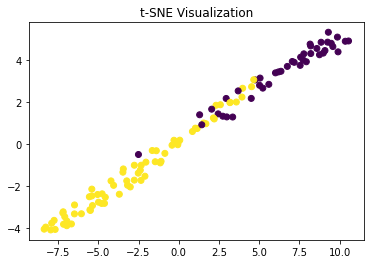

In [12]:
plt.scatter(X_t_sne[:, 0], X_t_sne[:, 1], c=y_test)
plt.title('t-SNE Visualization')
plt.show()

# Implementing the above code (PCA and t-sne) using pipelines

In [13]:
p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LinearRegression())
             ])

params = {'pca__n_components': [5,10,15,25]}

cancer_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
cancer_search = cancer_search.fit(X_train, y_train)

cancer_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LinearRegression())])

In [14]:
cancer_search.best_params_

{'pca__n_components': 5}

## t-sne visualization pipeline

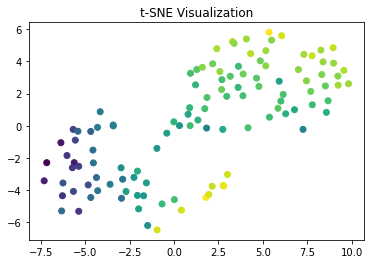

In [15]:
tsne_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('tsne', TSNE(n_components=2, random_state=42))
])

X_tsne = tsne_pipeline.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions)
plt.title('t-SNE Visualization')
plt.show()

# Using Kernel PCA

In [16]:
from sklearn.decomposition import KernelPCA
p_kca = Pipeline([('scaling', StandardScaler()), 
              ('kpca', KernelPCA()),
              ('model', LinearRegression())
             ])

params = {'kpca__n_components': [5,10,15,25,30],
          'kpca__kernel': ['poly', 'rbf']
         }

c_search = GridSearchCV(p_kca, param_grid=params, scoring='accuracy', cv=10, refit=True)
c_search = c_search.fit(X_train, y_train)

c_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('kpca', KernelPCA(kernel='poly', n_components=5)),
                ('model', LinearRegression())])

In [17]:
c_search.best_params_

{'kpca__kernel': 'poly', 'kpca__n_components': 5}

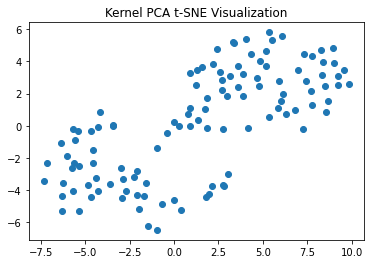

In [18]:
k_tsne_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('kpca', KernelPCA(n_components=2)),
    ('tsne', TSNE(n_components=2, random_state=42))
])

k_X_tsne = k_tsne_pipeline.fit_transform(X_test)

plt.scatter(k_X_tsne[:, 0], k_X_tsne[:, 1])
plt.title('Kernel PCA t-SNE Visualization')
plt.show()

**I have done the following in this lab:**
- Implemented normal PCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization.
- Implemented normal PCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization using pipelines.
- Implemented KernelPCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization using pipelines.